In [1]:
# IMPORT NECESSARY LIBRARIES
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
from IPython.display import Audio
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
import keras
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling2D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
import seaborn as sns
from keras.utils import to_categorical
from glob import glob
import cv2
from sklearn.utils import shuffle


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Using TensorFlow backend.


In [2]:
# READ IN AUDIO FILES 
audio = "/Users/murielkosaka/Desktop/transfer/audio/audio_speech_actors_01-24/"

In [3]:
dicts={'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}

In [4]:
path_main=audio

In [5]:
folders_main=os.listdir(path_main)

# Log-Mel Spectrogram

In [6]:
fname = audio + 'Actor_09/03-01-04-02-02-02-09.wav'  
y, sr = librosa.load(fname)
yt,_=librosa.effects.trim(y)

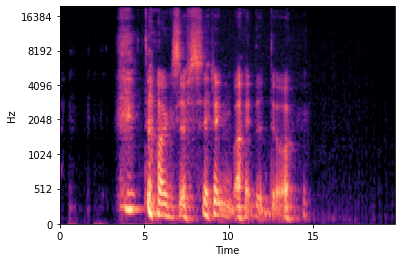

In [7]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');


In [ ]:
import re
counter=0
for folders in folders_main :
    path_in='/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/{0}'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='/Users/murielkosaka/Desktop/capstone_project/audio/sorted_data/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(y)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

# Noise

In [8]:
# FUNCTION TO ADD WHITE NOISE
def noise(y):
    noise_amp = 0.05*np.random.uniform()*np.amax(y)   
    y = y.astype('float64') + noise_amp * np.random.normal(size=y.shape[0])
    return y

In [9]:
fname = audio + 'Actor_09/03-01-04-02-02-02-09.wav'  
y, sr = librosa.load(fname)
yt,_=librosa.effects.trim(y)

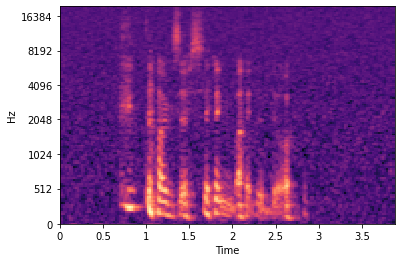

In [10]:
y = noise(y)
y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
db_spec = librosa.power_to_db(y)
librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');

In [ ]:
import re
counter=0
for folders in folders_main :
    path_in='/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/{0}'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='/Users/murielkosaka/Desktop/capstone_project/audio/noise/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        y = noise(y)
        y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(y)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

# Stretch

In [11]:
# FUNCTION TO STRETCH THE SOUND
def stretch(y, rate=0.8):
    data = librosa.effects.time_stretch(y, rate)
    return data

In [12]:
fname = audio + 'Actor_09/03-01-04-02-02-02-09.wav'  
y, sr = librosa.load(fname)
yt,_=librosa.effects.trim(y)

In [13]:
y=yt

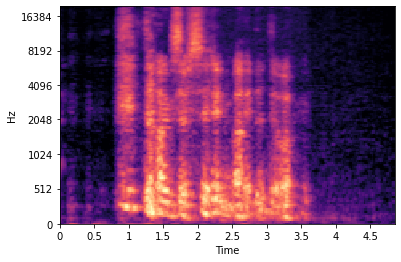

In [14]:
y= stretch(y)
y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
db_spec = librosa.power_to_db(y)
librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');

16 angry
16 fearful
16 fearful
16 angry
16 disgust
16 sad
16 sad
16 disgust
16 surprised
16 surprised
16 happy
16 happy
16 calm
16 neutral
16 calm
16 happy
16 happy
16 calm
16 calm
16 neutral
16 fearful
16 angry
16 angry
16 fearful
16 sad
16 disgust
16 disgust
16 sad
16 surprised
16 surprised
16 calm
16 neutral
16 calm
16 happy
16 happy
16 disgust
16 sad
16 sad
16 disgust
16 angry
16 fearful
16 fearful
16 angry
16 surprised
16 surprised
16 sad
16 disgust
16 disgust
16 sad
16 fearful
16 angry
16 angry
16 fearful
16 surprised
16 surprised
16 neutral
16 calm
16 calm
16 happy
16 happy
11 neutral
11 calm
11 calm
11 happy
11 happy
11 sad
11 disgust
11 disgust
11 sad
11 fearful
11 angry
11 angry
11 fearful
11 surprised
11 surprised
11 disgust
11 sad
11 sad
11 disgust
11 angry
11 fearful
11 fearful
11 angry
11 surprised
11 surprised
11 calm
11 neutral
11 calm
11 happy
11 happy
11 fearful
11 angry
11 angry
11 fearful
11 sad
11 disgust
11 disgust
11 sad
11 surprised
11 surprised
11 happy
11 happ

15 neutral
15 calm
15 happy
15 happy
23 disgust
23 sad
23 sad
23 disgust
23 angry
23 fearful
23 fearful
23 angry
23 surprised
23 surprised
23 calm
23 neutral
23 calm
23 happy
23 happy
23 neutral
23 calm
23 calm
23 happy
23 happy
23 sad
23 disgust
23 disgust
23 sad
23 fearful
23 angry
23 angry
23 fearful
23 surprised
23 surprised
23 happy
23 happy
23 calm
23 neutral
23 calm
23 angry
23 fearful
23 fearful
23 angry
23 disgust
23 sad
23 sad
23 disgust
23 surprised
23 surprised
23 fearful
23 angry
23 angry
23 fearful
23 sad
23 disgust
23 disgust
23 sad
23 surprised
23 surprised
23 happy
23 happy
23 calm
23 calm
23 neutral
24 happy
24 happy
24 calm
24 calm
24 neutral
24 fearful
24 angry
24 angry
24 fearful
24 sad
24 disgust
24 disgust
24 sad
24 surprised
24 surprised
24 angry
24 fearful
24 fearful
24 angry
24 disgust
24 sad
24 sad
24 disgust
24 surprised
24 surprised
24 happy
24 happy
24 calm
24 neutral
24 calm
24 sad
24 disgust
24 disgust
24 sad
24 fearful
24 angry
24 angry
24 fearful
24 su

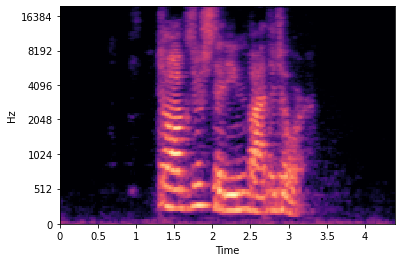

In [22]:
import re
counter=0
for folders in folders_main :
    path_in='/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/{0}'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='/Users/murielkosaka/Desktop/capstone_project/audio/stretch/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        y= stretch(y)
        y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(y)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

# Speed N Pitch

In [15]:
fname = audio + 'Actor_09/03-01-04-02-02-02-09.wav'  
y, sr = librosa.load(fname)
yt,_=librosa.effects.trim(y)

In [16]:
y=yt

In [17]:
# FUNCTION TO INCREASE SPEED AND PITCH 
def speedNpitch(y):
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.4  / length_change 
    tmp = np.interp(np.arange(0,len(y),speed_fac),np.arange(0,len(y)),y)
    minlen = min(y.shape[0], tmp.shape[0])
    y *= 0
    y[0:minlen] = tmp[0:minlen]
    return y

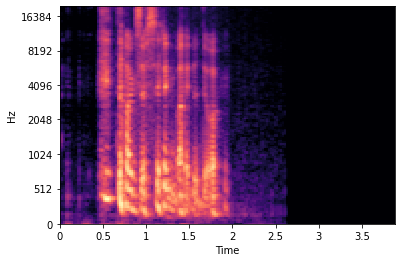

In [18]:
y= speedNpitch(y)
y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
db_spec = librosa.power_to_db(y)
librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');

In [ ]:
import re
counter=0
for folders in folders_main :
    path_in='/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/{0}'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='/Users/murielkosaka/Desktop/capstone_project/audio/speednpitch/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        aug= stretch(y)
        aug = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(aug)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)